# Iris Classification, K-means, K -fold cross Validation

In [7]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [16]:
def make_report(gt_list, pred_list, labels, data_type="Training"):
    print("%s metrics: " % (data_type))
    print("Sample count %d" %(len(gt_list)))
    print("Percent %s accuracy %d" %(data_type, 100 * accuracy_score(gt_list, pred_list)))
    print("%s confusion metrics: " %(data_type))
    ConfusionMatrixDisplay.from_predictions(gt_list, 
                                                 pred_list, 
                                                 display_labels=labels, 
                                                 xticks_rotation="vertical"
                                            )
    plt.tight_layout()
    plt.show()

In [18]:
from sklearn import datasets

iris_ds = datasets.load_iris()
print("Loaded Data Type", type(iris_ds))
print("Exploratory Analysis Sklearn Data : ",iris_ds.keys())
print("Features available for classification : ", iris_ds['feature_names'])
print("Iris Classes : ", iris_ds['target_names'])
labels = iris_ds['target_names']

Loaded Data Type <class 'sklearn.utils._bunch.Bunch'>
Exploratory Analysis Sklearn Data :  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Features available for classification :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris Classes :  ['setosa' 'versicolor' 'virginica']


In [19]:
iris_df = pd.DataFrame(data = iris_ds['data'], columns = iris_ds['feature_names'])
iris_df['species'] = iris_ds['target']

x = iris_df.drop(['species'], axis=1)
y = iris_df['species']

X_train, x_test, Y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Logistic Regression
Logistic Regression is a classification algorithm is used to predict a binary outcome based on a set of independent variables.

With that said algorithm still works for multi-class cases, by using alternate schemes for producing final results. Algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’. 

This class implements regularized logistic regression using the ‘liblinear’ library, ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ solvers. 

To read more about solver and which one could be used for which problem, refer to https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Note that regularization is applied by default. It can handle both dense and sparse input. 

Training metrics: 
Sample count 105
Percent Training accuracy 98
Training confusion metrics: 


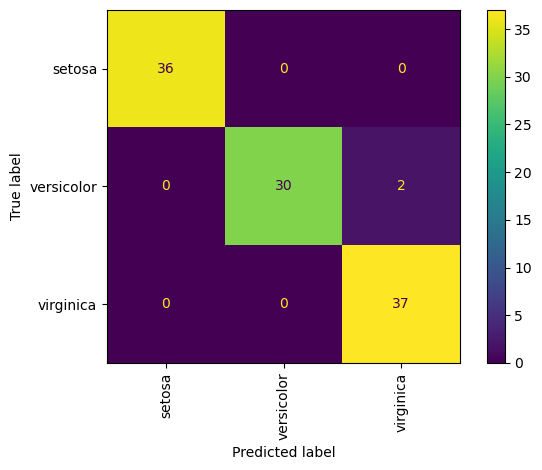

Test metrics: 
Sample count 45
Percent Test accuracy 97
Test confusion metrics: 


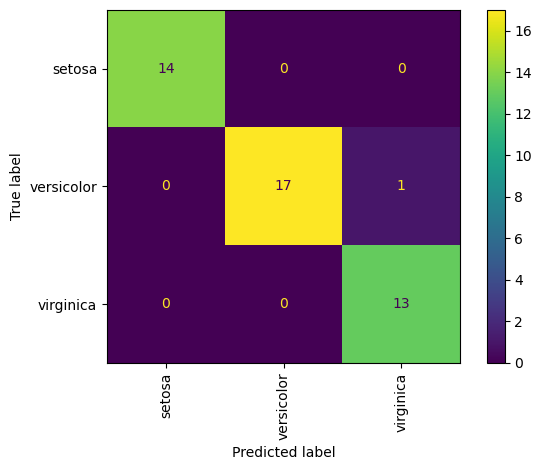

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
model.fit(X_train, Y_train)


# Check how the training went
y_train_new = model.predict(X_train)
y_test_new = model.predict(x_test)

# Training Reports
make_report(gt_list=Y_train, pred_list=y_train_new, labels=labels, data_type="Training")
make_report(gt_list=y_test, pred_list=y_test_new, labels=labels, data_type="Test")

### K-means Clustering 

A cluster refers to a collection of data points aggregated together because of certain similarities. Clustering is a type of unsupervised algorithm. Clustering can be used mainly for exploratory analysis where inferences are made from datasets using only input vectors without referring to known, or labelled, outcomes.

In other cases, instead of using ground truth labels and training model in a supervised way, it makes sense to check out if data can naturally be clustered in n classes. In some cases, natural clusters may actually be very close to expected classification. 

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:

- The centroids have stabilized — there is no change in their values because the clustering has been successful.
- The defined number of iterations has been achieved.


c:\Anaconda3_64\envs\ml_python_11_venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training metrics: 
Sample count 105
Percent Training accuracy 29
Training confusion metrics: 


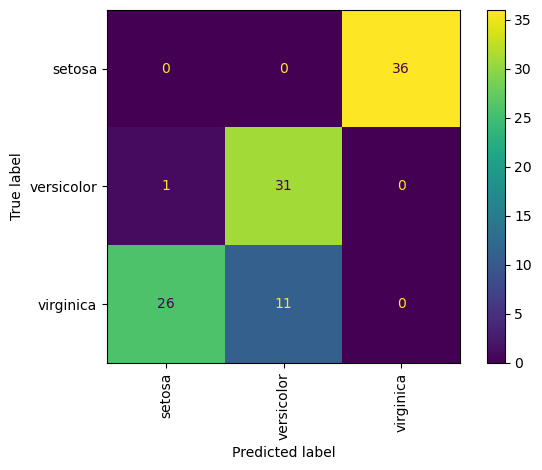

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='random', max_iter=500)
kmeans.fit(X_train)

# Check how the training went
y_train_new = (kmeans.labels_)

# Training Reports
make_report(gt_list=Y_train, pred_list=y_train_new, labels=labels, data_type="Training")
